In [1]:
import labcamera_tis
Device = labcamera_tis.Device

[2021-11-12 14:19:59,142 ks-labcamera-tis] INFO: loaded TIS_UDSHL


In [2]:
Device.list_names()

('DMK 33UP1300 2121006',)

In [3]:
dev = Device('DMK 33UP1300 2121006')

[2021-11-12 14:20:04,811 ks-labcamera-tis] INFO: video format--> Y16 (640x480), color: Y16 (11), buffersize=614400
[2021-11-12 14:20:05,143 ks-labcamera-tis] INFO: Startup Behavior/Save Current State: Button
[2021-11-12 14:20:05,145 ks-labcamera-tis] INFO: Startup Behavior/Restore Factory Default: Button
[2021-11-12 14:20:05,147 ks-labcamera-tis] INFO: Startup Behavior/Status: MapStrings
[2021-11-12 14:20:05,149 ks-labcamera-tis] INFO: Brightness/Value: Range
[2021-11-12 14:20:05,151 ks-labcamera-tis] INFO: Sharpness/Value: Range
[2021-11-12 14:20:05,152 ks-labcamera-tis] INFO: Gamma/Value: AbsoluteValue
[2021-11-12 14:20:05,153 ks-labcamera-tis] INFO: Gamma/Value: Range
[2021-11-12 14:20:05,153 ks-labcamera-tis] INFO: Gain/Value: Range
[2021-11-12 14:20:05,153 ks-labcamera-tis] INFO: Gain/Value: AbsoluteValue
[2021-11-12 14:20:05,154 ks-labcamera-tis] INFO: Gain/Auto: Switch
[2021-11-12 14:20:05,154 ks-labcamera-tis] INFO: Exposure/Value: Range
[2021-11-12 14:20:05,154 ks-labcamera-ti

In [4]:
dev._is_open()

True

In [5]:
dev.is_valid()

True

In [6]:
dev.video_format

'Y16 (640x480)'

In [7]:
dev.list_video_formats()

('Y16 (256x16)',
 'Y16 (320x240)',
 'Y16 (320x256)',
 'Y16 (320x480)',
 'Y16 (352x240)',
 'Y16 (352x288)',
 'Y16 (384x288)',
 'Y16 (640x240)',
 'Y16 (640x288)',
 'Y16 (640x480)',
 'Y16 (640x512)',
 'Y16 (704x576)',
 'Y16 (720x240)',
 'Y16 (720x288)',
 'Y16 (720x480)',
 'Y16 (720x576)',
 'Y16 (768x576)',
 'Y16 (1024x768)',
 'Y16 (1280x960)',
 'Y16 (1280x1024)',
 'Y800 (256x16)',
 'Y800 (320x240)',
 'Y800 (320x256)',
 'Y800 (320x480)',
 'Y800 (352x240)',
 'Y800 (352x288)',
 'Y800 (384x288)',
 'Y800 (640x240)',
 'Y800 (640x288)',
 'Y800 (640x480)',
 'Y800 (640x512)',
 'Y800 (704x576)',
 'Y800 (720x240)',
 'Y800 (720x288)',
 'Y800 (720x480)',
 'Y800 (720x576)',
 'Y800 (768x576)',
 'Y800 (1024x768)',
 'Y800 (1280x960)',
 'Y800 (1280x1024)',
 'RGB24 (256x16)',
 'RGB24 (320x240)',
 'RGB24 (320x256)',
 'RGB24 (320x480)',
 'RGB24 (352x240)',
 'RGB24 (352x288)',
 'RGB24 (384x288)',
 'RGB24 (640x240)',
 'RGB24 (640x288)',
 'RGB24 (640x480)',
 'RGB24 (640x512)',
 'RGB24 (704x576)',
 'RGB24 (720x24

In [8]:
dev.video_format = 'RGB24 (320x240)'

[2021-11-12 14:20:05,188 ks-labcamera-tis] INFO: video format--> RGB24 (320x240), color: RGB24 (2), buffersize=230400


In [9]:
dev.video_format

'RGB24 (320x240)'

In [10]:
dev.triggered

False

In [11]:
dev.triggered = False
dev.triggered

False

In [12]:
dev.frame_rate

1.0

In [13]:
dev.frame_rate = 2

dev.frame_rate

2.0

In [14]:
dev.props["Exposure"]["Value"].interfaces

('Range', 'AbsoluteValue')

In [15]:
dev.props["Exposure"]["Auto"].type

'Switch'

In [16]:
dev.props["Exposure"]["Auto"].value

True

In [17]:
dev.props["Exposure"]["Value"].value

0.010200000368058681

In [18]:
dev.props["Exposure"]["Value"].value = 0.010
dev.props["Exposure"]["Value"].value

0.009999999776482582

In [19]:
dev.props["Startup Behavior"]["Status"].value

'Factory Default'

## Testing capture

In [20]:

import numpy as np
import matplotlib.pyplot as plt
from time import sleep

In [21]:
FRAME = None

def callback(frame):
    global FRAME
    print(f"received a frame: shape={np.shape(frame)}", flush=True)
    if frame is not None:
        FRAME = frame.copy()

In [22]:
dev.callbacks.append(callback)

In [23]:
dev.prepare()

In [24]:
dev.start()
sleep(2)

received a frame: shape=(240, 320, 3)
received a frame: shape=(240, 320, 3)


In [25]:
dev.stop()

received a frame: shape=()


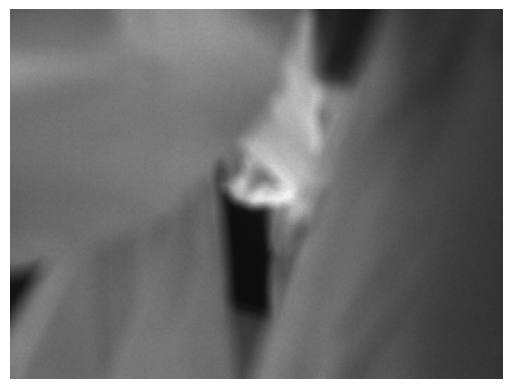

In [26]:
plt.imshow(FRAME)
plt.gca().set_axis_off()
plt.show()

In [27]:
dev.close()

In [28]:
dev.is_valid()

False

In [29]:
del dev

In [30]:
del Device
del labcamera_tis